<a href="https://colab.research.google.com/github/AndreSlavescu/UW-Datathon/blob/main/UW_DSC_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation and Setup

In [1]:
!pip install tensorflow matplotlib pandas numpy

In [2]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab import drive

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Dataset Setup

Dataset 📈: https://www.kaggle.com/pranavraikokte/covid19-image-dataset    

The dataset being used is a collection of images under 3 classes. The three classes "Normal", "Covid-19", and "Viral Pneumonia" are used to categorize the aforementioned images to help classify a new assortment of similar X-Ray images. 

In [3]:
# Download the dataset from the link above and import it into your google drive

# Hook Google Drive to Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


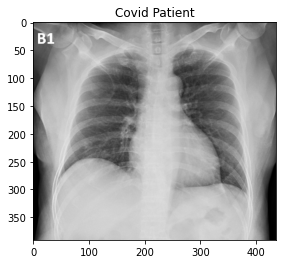

In [4]:
# Example Image from Dataset

example_image = image.load_img("/content/drive/MyDrive/Covid19-dataset/test/Covid/094.png", color_mode = "rgb")

plt.title("Covid Patient")
plt.imshow(example_image)

In [5]:
# Data Augmentation

# Generate Black and White images 
training_data = ImageDataGenerator(rescale=1/255)
testing_data = ImageDataGenerator(rescale=1/255)

In [6]:
# Training Data
train_dataset =  training_data.flow_from_directory("/content/drive/MyDrive/Covid19-dataset/train",
                                                   target_size = (224, 224),
                                                   batch_size = 25)  

Found 251 images belonging to 3 classes.


In [7]:
# Training Dataset Classes
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [8]:
# Testing Data
test_dataset = testing_data.flow_from_directory("/content/drive/MyDrive/Covid19-dataset/test",
                                                   target_size = (224, 224),
                                                   batch_size = 6)

Found 66 images belonging to 3 classes.


In [9]:
# Testing Dataset Classes
test_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

### Building the Model

Model information 💻:

We'll be using VGG-16 which is one of the most powerful convolutional neural network (CNN) architectures. VGG-16 is a pre-trained model that takes in image data of 224 by 224 pixels which is why we are targeting that resolution in our datasets. 

More about the VGG-16 CNN model: https://www.geeksforgeeks.org/vgg-16-cnn-model/

In [10]:
# Define the Model

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=32,
                                        kernel_size=3,
                                        strides = 1,
                                        activation='relu',
                                        padding = "same",
                                        input_shape = (224,224,3)),
                          
                          tf.keras.layers.MaxPooling2D(pool_size = 2),

                          tf.keras.layers.Conv2D(filters=64,
                                        kernel_size=3,
                                        strides = 1,
                                        activation='relu',
                                        padding = "same",
                                        input_shape = (224,224,3)),
                          
                          tf.keras.layers.MaxPooling2D(pool_size = 2),

                          tf.keras.layers.Conv2D(filters=128,
                                        kernel_size=3,
                                        strides = 1,
                                        activation='relu',
                                        padding = "same",
                                        input_shape = (224,224,3)),
                          
                          tf.keras.layers.MaxPooling2D(pool_size = 2),

                          tf.keras.layers.Conv2D(filters=256,
                                        kernel_size=3,
                                        strides = 1,
                                        activation='relu',
                                        padding = "same",
                                        input_shape = (224,224,3)),
                          
                          tf.keras.layers.MaxPooling2D(pool_size = 2),

                          # Flatten Output
                          tf.keras.layers.Flatten(),


                          # Dense Layers
                          tf.keras.layers.Dense(128, activation = "relu"),
                          tf.keras.layers.Dense(64, activation = "relu"),
                          tf.keras.layers.Dense(3, activation = "softmax"),
                          ])

In [11]:
# Compile the Model

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

### Training the Model on our Dataset

In [12]:
model_train = model.fit(train_dataset,
                        steps_per_epoch = 3,
                        epochs=10,
                        validation_data=test_dataset)

Epoch 1/10
3/3 [==============================] - 82s 30s/step - loss: 1.1445 - accuracy: 0.3200 - val_loss: 1.0819 - val_accuracy: 0.4848
Epoch 2/10
3/3 [==============================] - 41s 13s/step - loss: 1.0217 - accuracy: 0.6400 - val_loss: 0.9293 - val_accuracy: 0.5606
Epoch 3/10
3/3 [==============================] - 35s 11s/step - loss: 0.8184 - accuracy: 0.6000 - val_loss: 0.9638 - val_accuracy: 0.5152
Epoch 4/10
3/3 [==============================] - 20s 5s/step - loss: 0.8019 - accuracy: 0.6078 - val_loss: 0.9256 - val_accuracy: 0.5909
Epoch 5/10
3/3 [==============================] - 22s 8s/step - loss: 0.4580 - accuracy: 0.8000 - val_loss: 0.6706 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 21s 7s/step - loss: 0.2364 - accuracy: 0.9067 - val_loss: 2.7052 - val_accuracy: 0.6515
Epoch 7/10
3/3 [==============================] - 18s 6s/step - loss: 0.5330 - accuracy: 0.8400 - val_loss: 0.6293 - val_accuracy: 0.6667
Epoch 8/10
3/3 [===============

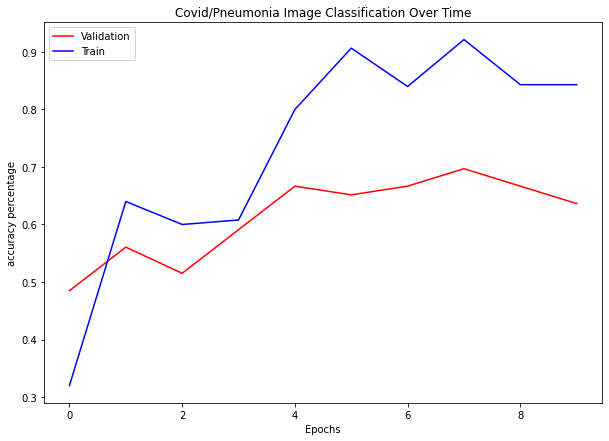

In [13]:
plt.figure(figsize = (10,7))

plt.plot(model_train.history["val_accuracy"], color = "r")
plt.plot(model_train.history["accuracy"], color = "b")

plt.title("Covid/Pneumonia Image Classification Over Time")
plt.xlabel("Epochs")
plt.ylabel("accuracy percentage")

plt.legend(["Validation", "Train"], loc="upper left")

plt.show()